# Быстрое погружение в питон

Есть 2 типа ячеек - ячейки с кодом (Code) и ячейки с текстом (Markdown)

(это ячейка с текстом)

In [1]:
# это ячейка с кодом
# код ячейки выполняется по нажатию Shift+Enter (Shift+Return на Маке)

# Результат отработки кода появляется сразу под ячейкой, если ваш код должен что-то выводить

1 + 1

2

In [ ]:
# значок решетки - это комментарий, он не выполняется

### Что нам нужно знать:

Все, чем мы будем пользоваться - это, в основном, либо объект, либо метод, который лежит внутри объекта или навешивается на него сверху (по-другому, функция)

In [2]:
x = 10

# теперь в х лежит десятка и можем делать с ней все, что захотим

x = x + 5

x += 5

x -= 15
x /= 5
x

1.0

In [3]:
x += 10
x = 8
x

8

Переменная — это имя для значения.

Базовые типы, которые им встретятся:

- число (int, float);

- строка (str);

- список (list);

- словарь (dict);

- датафрейм/табличка (DataFrame)

In [4]:
price = 120.5          # число
hotel_name = "City"    # строка

guests = [1, 2, 3]     # список
booking = {            # словарь — «записи» с ключами и значениями по этим ключам
    "hotel": "City",
    "is_canceled": 0,
    "adr": 120.5,
}

booking["hotel"]       # доступ к полю словаря по ключу

'City'

Библиотека — это набор готовых функций/классов.

import pandas as pd — «подключить библиотеку pandas и обращаться к ней как pd».

В Питоне почти всё — объекты, у них есть методы: что-то.метод(...)

In [5]:
import pandas as pd

# Создадим небольшую табличку вручную
data = [
    {"hotel": "City",   "is_canceled": 0, "price": 100},
    {"hotel": "Resort", "is_canceled": 1, "price": 150},
    {"hotel": "City",   "is_canceled": 0, "price": 120},
]

df_demo = pd.DataFrame(data)
df_demo

,hotel,is_canceled,price
0,City,0,100
1,Resort,1,150
2,City,0,120


In [ ]:
df_demo.head(2)

,hotel,is_canceled,price
0,City,0,100
1,Resort,1,150


In [6]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel        3 non-null      object
 1   is_canceled  3 non-null      int64 
 2   price        3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [7]:
df_demo.describe()

,is_canceled,price
count,3.000000,3.000000
mean,0.333333,123.333333
std,0.577350,25.166115
min,0.000000,100.000000
25%,0.000000,110.000000
50%,0.000000,120.000000
75%,0.500000,135.000000
max,1.000000,150.000000


In [8]:
# Мы можем обращаться к конкретным колонкам

print(df_demo.columns)

df_demo['hotel']

Index(['hotel', 'is_canceled', 'price'], dtype='object')


,hotel
0,City
1,Resort
2,City


In [9]:
# Если хотим обратиться к нескольким колонкам сразу - используем список

df_demo[['hotel', 'price']]

,hotel,price
0,City,100
1,Resort,150
2,City,120


In [10]:
# почти все, что вы хотите посчитать - можно посчитать в одно или несколько действий
# выведем среднюю цену

print(df_demo['price'].mean())

# среднюю цену для отелей в городе

print(df_demo[df_demo['hotel'] == 'City']['price'].mean())

123.33333333333333
110.0


### Простите если этот семинар будет выглядеть примерно вот так
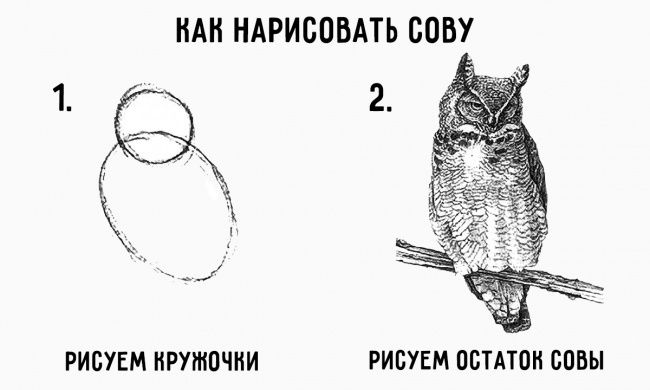


Но это все действительно не так сложно, особенно когда у нас есть DeepSeek и ЧатГПТ!!!


# EDA: Что приводит к отменам бронирования отелей и как их уменьшить?

**Набор данных**: Спрос на бронирование отелей.
Ссылка на датасет: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

**Бизнес-вопрос**: *Что влияет на отмены бронирований отелей, и как мы можем уменьшить отмены?*





## Что будем учиться делать



1.   Проверять качество данных и делать необходимые правки в данных
2.   Делать базовую аналитику данных (смотреть распределения признаков / статистики)
3. Делать **выводы** на основе базовой аналитики и составлять **рекомендации** по дальнешим шагам



## **0. Импорт библиотек**

In [11]:

# --- Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import kagglehub

pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', '{:,.3f}'.format)

# Helper: pretty separator
def hr(title=None):
    print("\n" + "="*90)
    if title:
        print(title)
        print("="*90)

In [12]:
import warnings
warnings.filterwarnings('ignore')


## **1. Загрузка данных**


In [13]:
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")
print("Path to dataset files:", path)

# Load
df_raw = pd.read_csv(path + '/hotel_bookings.csv')

# Work on a copy to keep raw untouched
df = df_raw.copy()


Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


# 🏨 Описание переменных датасета *Hotel Bookings*

Ниже приведено краткое описание всех признаков, доступных в датасете.  
Это поможет лучше ориентироваться при выполнении EDA и построении моделей.

---

## 📌 Таблица признаков

| Переменная | Тип | Описание |
|-----------|-----|----------|
| hotel | строка | Тип отеля (H1 — курортный, H2 — городской). |
| is_canceled | число | Факт отмены бронирования (1 — отменено, 0 — нет). |
| lead_time | число | Количество дней между созданием брони и датой заезда. |
| arrival_date_year | число | Год заезда. |
| arrival_date_month | строка | Месяц заезда. |
| arrival_date_week_number | число | Номер недели года даты заезда. |
| arrival_date_day_of_month | число | День месяца даты заезда. |
| stays_in_weekend_nights | число | Количество ночей в выходные (сб–вс). |
| stays_in_week_nights | число | Количество ночей в будни (пн–пт). |
| adults | число | Количество взрослых гостей. |
| children | число | Количество детей. |
| babies | число | Количество младенцев. |
| meal | строка | Тип питания: SC/Undefined — без питания; BB — завтрак; HB — полупансион; FB — полный пансион. |
| country | строка | Страна происхождения (ISO 3155–3:2013). |
| market_segment | строка | Сегмент рынка (TA — агенты, TO — туроператоры). |
| distribution_channel | строка | Канал бронирования (TA — агенты, TO — туроператоры). |
| is_repeated_guest | число | Признак повторного гостя (1 — да, 0 — нет). |
| previous_cancellations | число | Количество прошлых отмен бронирований. |
| previous_bookings_not_canceled | число | Количество прошлых бронирований без отмен. |
| reserved_room_type | строка | Забронированный тип комнаты (код). |
| assigned_room_type | строка | Фактически выданный тип комнаты (код). |
| booking_changes | число | Количество изменений, внесённых в бронь. |
| deposit_type | строка | Тип депозита: No Deposit — без депозита; Non Refund — невозвратный; Refundable — возвратный. |
| agent | строка | ID турагентства, создавшего бронь. |
| company | строка | ID компании, оплатившей или сделавшей бронь. |
| days_in_waiting_list | число | Количество дней в листе ожидания до подтверждения. |
| customer_type | строка | Тип клиента: Contract, Group, Transient, Transient-party. |
| adr | число | Средняя стоимость за ночь (Average Daily Rate). |
| required_car_parking_spaces | число | Требуемое количество парковочных мест. |
| total_of_special_requests | число | Количество специальных запросов гостя. |
| reservation_status | строка | Финальный статус бронирования: Canceled, Check-Out, No-Show. |
| reservation_status_date | дата/число | Дата установки финального статуса. |

---

## Примечание
Некоторые переменные представлены в кодированном виде (например, тип комнаты или ID агентства).  
При анализе может потребоваться перекодировать их в более удобный формат или агрегировать.

---


### 1.1 Верхнеуровневый анализ после загрузки данных

In [ ]:

hr("Basic info")
print('shape of a dataset (rows; columns): ', df.shape)
df.info()


Basic info
shape of a dataset (rows; columns):  (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies          

In [ ]:
hr("First 5 rows of a dataset")
display(df.head(5))



First 5 rows of a dataset


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000,NaN,0,Transient,75.000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000,NaN,0,Transient,98.000,0,1,Check-Out,2015-07-03


In [ ]:
hr("Numeric summary")
display(df.describe(include=[np.number]).T)


Numeric summary


,count,mean,std,min,25%,50%,75%,max
is_canceled,"119,390.000",0.370,0.483,0.000,0.000,0.000,1.000,1.000
lead_time,"119,390.000",104.011,106.863,0.000,18.000,69.000,160.000,737.000
arrival_date_year,"119,390.000","2,016.157",0.707,"2,015.000","2,016.000","2,016.000","2,017.000","2,017.000"
arrival_date_week_number,"119,390.000",27.165,13.605,1.000,16.000,28.000,38.000,53.000
arrival_date_day_of_month,"119,390.000",15.798,8.781,1.000,8.000,16.000,23.000,31.000
stays_in_weekend_nights,"119,390.000",0.928,0.999,0.000,0.000,1.000,2.000,19.000
stays_in_week_nights,"119,390.000",2.500,1.908,0.000,1.000,2.000,3.000,50.000
adults,"119,390.000",1.856,0.579,0.000,2.000,2.000,2.000,55.000
children,"119,386.000",0.104,0.399,0.000,0.000,0.000,0.000,10.000
babies,"119,390.000",0.008,0.097,0.000,0.000,0.000,0.000,10.000


In [ ]:
hr("Categorical overview (top levels)")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols[:12]:
    print(f"\n-- {c} --")
    print(df[c].value_counts(dropna=False).head(10))
print(f"\n...and {max(0, len(cat_cols)-12)} more categorical columns")


Categorical overview (top levels)

-- hotel --
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

-- arrival_date_month --
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
Name: count, dtype: int64

-- meal --
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

-- country --
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

-- market_segment --
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

-- distribution_channel --
distribution_channel
TA


## **2. Проверка качества данных**

Какие проблемы мы можем увидеть на этом этапе:
- **Пропущенные значения**
- **Дубликаты**
- **Подозрительные значения** (например, слишком высокие / маленькие / нереалистичные значения в каких-то признаках).

In [ ]:

# Missingness report
def missing_report(df_):
    miss = df_.isna().sum().sort_values(ascending=False)
    perc = (miss / len(df_)).round(4) * 100
    rep = pd.DataFrame({'missing': miss, 'missing_%': perc})
    return rep[rep['missing']>0]

hr("Missing values")
display(missing_report(df))



Missing values


,missing,missing_%
company,112593,94.310
agent,16340,13.690
country,488,0.410
children,4,0.000


In [ ]:
# Duplicates by full-row match
hr("Duplicates (full row)")
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)


Duplicates (full row)
Duplicate rows: 31994


In [ ]:
# Simple integrity checks
hr("Integrity checks")
checks = {
    "non_negative_stays_weekend": (df['stays_in_weekend_nights'] >= 0).all(),
    "non_negative_stays_week": (df['stays_in_week_nights'] >= 0).all(),
    "non_negative_adr": (df['adr'] >= 0).all(),
    "positive_party_size_exists": ((df['adults'].fillna(0) + df['children'].fillna(0) + df['babies'].fillna(0)) > 0).all(),
}
checks


Integrity checks


{'non_negative_stays_weekend': np.True_,
 'non_negative_stays_week': np.True_,
 'non_negative_adr': np.False_,
 'positive_party_size_exists': np.False_}

### 2.1 Подправим данные на основании того, что мы увидели

In [ ]:

# Если количество детей - пустое значение - то давайте проставим 0.
df['children'] = df['children'].fillna(0)

# Поправим пустые значения и в других колонках (company и agent - это ID компании / агентства)
df['company'] = df['company'].fillna(-1)
df['agent'] = df['agent'].fillna(-1)
df['country'] = df['country'].fillna('UNDEFINED')


# На всякий случай удостоверяемся, что наша целевая переменная - это целое число (0 / 1)
df['is_canceled'] = df['is_canceled'].astype(int)



### 2.2 А еще, можем сразу создать полезные признаки

In [ ]:
# Давайте сделаем новую колонку - дату прибытия (сейчас у нас есть только месяц / неделя / день прибытия отдельно)
month_map = {m:i for i,m in enumerate(['January','February','March','April','May','June','July','August','September','October','November','December'], start=1)}
mcol = df['arrival_date_month']
mnum = mcol.map(lambda x: month_map.get(str(x), np.nan) if not pd.isna(x) else np.nan)
df['arrival_date'] = pd.to_datetime(dict(year=df['arrival_date_year'],
                                          month=mnum,
                                          day=df['arrival_date_day_of_month']), errors='coerce')


# Посчитаем, сколько всего человек указано в бронировании (party_size)
for col in ['adults','children','babies']:
    if col not in df.columns: df[col] = 0
df['party_size'] = df['adults'].fillna(0) + df['children'].fillna(0) + df['babies'].fillna(0)


## **3. Анализируем!**


In [14]:

hr("Overall cancellation rate")
rate = df['is_canceled'].mean()
print(f"Overall cancellation rate: {rate:.2%}")


Overall cancellation rate
Overall cancellation rate: 37.04%


In [15]:
hr("By hotel type")
display(df.groupby('hotel')['is_canceled'].agg(['mean','count']).rename(columns={'mean':'cancel_rate'}).sort_values('cancel_rate', ascending=False))


By hotel type


,cancel_rate,count
hotel,,
City Hotel,0.417,79330
Resort Hotel,0.278,40060



Over time (year-month)


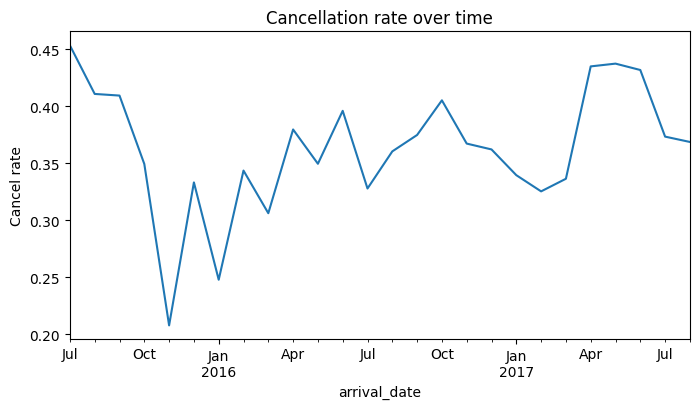

In [ ]:
hr("Over time (year-month)")

over_time = df.groupby(pd.Grouper(key='arrival_date', freq='M'))['is_canceled'].mean().dropna()
ax = over_time.plot(title='Cancellation rate over time', figsize=(8,4))
ax.set_ylabel('Cancel rate')
plt.show()

### 3.1 Корреляционная матрица признаков

In [ ]:
def plot_correlation_heatmap(
    df: pd.DataFrame,
    target: str = "is_canceled",
    include_target: bool = True,
    method: str = "pearson",
    order: str = "by_target",
    figsize: tuple = (10, 8),
):
    """
    Строит ТРЕУГОЛЬНУЮ heatmap корреляций по числовым признакам и возвращает DataFrame с корреляциями.
    - Маскирует дубликаты (верхний треугольник) и диагональ (self-corr).
    - Цвета: -1 (красный) -> 0 (белый) -> +1 (зелёный).
    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if not include_target and target in num_cols:
        num_cols.remove(target)
    if len(num_cols) == 0:
        raise ValueError("В датафрейме нет числовых признаков для корреляции.")

    corr = df[num_cols].corr(method=method)

    if order == "by_target" and target in corr.columns:
        order_idx = corr[target].abs().sort_values(ascending=False).index.tolist()
        corr = corr.loc[order_idx, order_idx]

    mask = np.triu(np.ones_like(corr, dtype=bool), k=0)  # True для верхнего треугольника + диагонали
    data = corr.to_numpy(copy=True)
    data = np.ma.masked_where(mask, data)                # маскируем True-ячейки

    cmap = LinearSegmentedColormap.from_list("red_white_green", [(1,0,0), (1,1,1), (0,1,0)], N=256)
    cmap.set_bad(alpha=0.0)  # замаскированные области делаем прозрачными
    norm = Normalize(vmin=-1, vmax=1, clip=True)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(data, cmap=cmap, norm=norm)

    ax.set_xticks(range(corr.shape[1]))
    ax.set_yticks(range(corr.shape[0]))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right")
    ax.set_yticklabels(corr.index)

    ax.set_xticks(np.arange(-.5, corr.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, corr.shape[0], 1), minor=True)
    ax.grid(which="minor", color="lightgray", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)

    ax.set_title(f"Correlation heatmap (triangular, {method})")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Correlation", rotation=270, labelpad=12)

    plt.tight_layout()
    plt.show()

    return corr

- *Какие признаки больше всего коррелируют с нашей целевой переменной?*
- *Можно ли сказать, что высокая корреляция - это то же самое, что и высокое влияние признака на целевую переменную?*

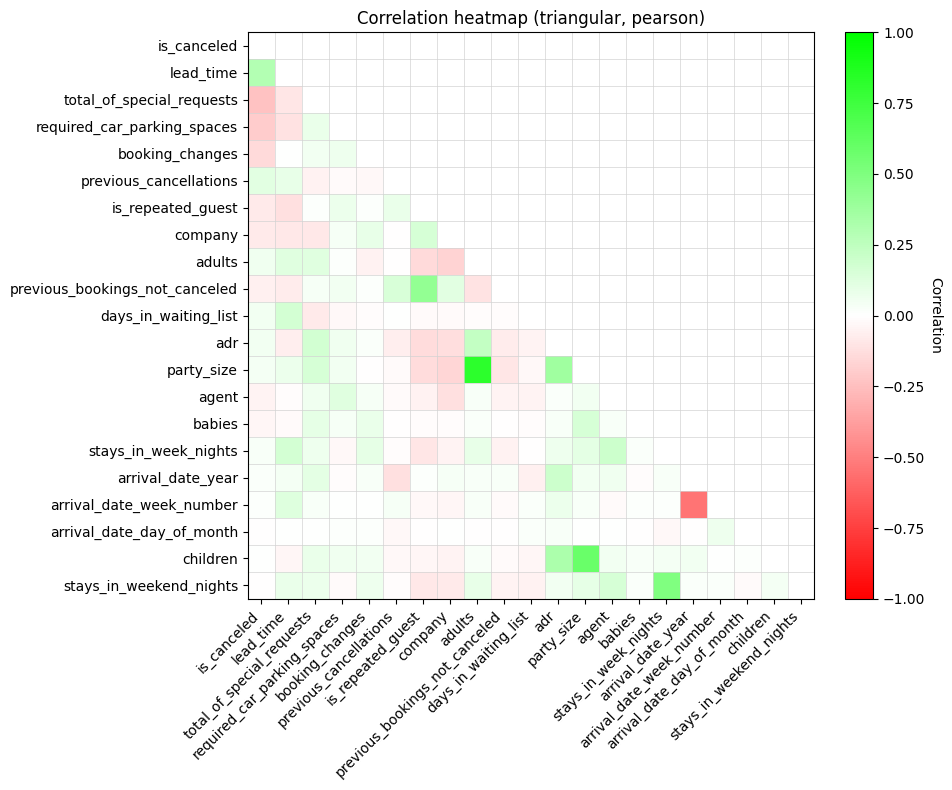

,is_canceled,lead_time,total_of_special_requests,required_car_parking_spaces,booking_changes,previous_cancellations,is_repeated_guest,company,adults,previous_bookings_not_canceled,days_in_waiting_list,adr,party_size,agent,babies,stays_in_week_nights,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,children,stays_in_weekend_nights
is_canceled,1.000,0.293,-0.235,-0.195,-0.144,0.110,-0.085,-0.083,0.060,-0.057,0.054,0.048,0.047,-0.046,-0.032,0.025,0.017,0.008,-0.006,0.005,-0.002
lead_time,0.293,1.000,-0.096,-0.116,0.000,0.086,-0.124,-0.086,0.120,-0.074,0.170,-0.063,0.072,-0.012,-0.021,0.166,0.040,0.127,0.002,-0.038,0.086
total_of_special_requests,-0.235,-0.096,1.000,0.083,0.053,-0.048,0.013,-0.091,0.123,0.038,-0.083,0.172,0.157,0.061,0.098,0.068,0.109,0.026,0.003,0.082,0.073
required_car_parking_spaces,-0.195,-0.116,0.083,1.000,0.066,-0.018,0.077,0.038,0.015,0.048,-0.031,0.057,0.048,0.119,0.037,-0.025,-0.014,0.002,0.009,0.056,-0.019
booking_changes,-0.144,0.000,0.053,0.066,1.000,-0.027,0.012,0.089,-0.052,0.012,-0.012,0.020,-0.003,0.036,0.083,0.096,0.031,0.006,0.011,0.049,0.063
previous_cancellations,0.110,0.086,-0.048,-0.018,-0.027,1.000,0.082,-0.001,-0.007,0.153,0.006,-0.066,-0.020,-0.018,-0.008,-0.014,-0.120,0.036,-0.027,-0.025,-0.013
is_repeated_guest,-0.085,-0.124,0.013,0.077,0.012,0.082,1.000,0.160,-0.146,0.418,-0.022,-0.134,-0.137,-0.053,-0.009,-0.097,0.010,-0.030,-0.006,-0.033,-0.087
company,-0.083,-0.086,-0.091,0.038,0.089,-0.001,0.160,1.000,-0.167,0.112,-0.023,-0.129,-0.159,-0.123,-0.009,-0.044,0.034,-0.033,0.004,-0.043,-0.080
adults,0.060,0.120,0.123,0.015,-0.052,-0.007,-0.146,-0.167,1.000,-0.108,-0.008,0.231,0.821,0.026,0.018,0.093,0.030,0.026,-0.002,0.030,0.092
previous_bookings_not_canceled,-0.057,-0.074,0.038,0.048,0.012,0.153,0.418,0.112,-0.108,1.000,-0.009,-0.072,-0.099,-0.047,-0.007,-0.049,0.029,-0.021,-0.000,-0.021,-0.043


In [ ]:
corr_df = plot_correlation_heatmap(df, target="is_canceled", include_target=True, method="pearson", order="by_target")
display(corr_df.round(3))


### 3.2 Посмотрим на категориальные признаки


In [ ]:
# Пишем функцию, которая будет рисовать нам cancellation rate по категориальной переменной
def rate_by_category(df_, col, min_count=100, top_n=20, rotate=45, title=None):
    t = df_.groupby(col)['is_canceled'].agg(['mean','count']).rename(columns={'mean':'cancel_rate'})
    t = t[t['count']>=min_count].sort_values('cancel_rate', ascending=False).head(top_n)
    ax = t['cancel_rate'].plot(kind='bar', figsize=(8,4), title=title or f'Cancellation rate by {col}')
    ax.set_ylabel('Cancel rate')
    plt.xticks(rotation=rotate)
    plt.show()
    return t


Categorical drivers — market_segment / distribution_channel / deposit_type / customer_type / is_repeated_guest

### market_segment


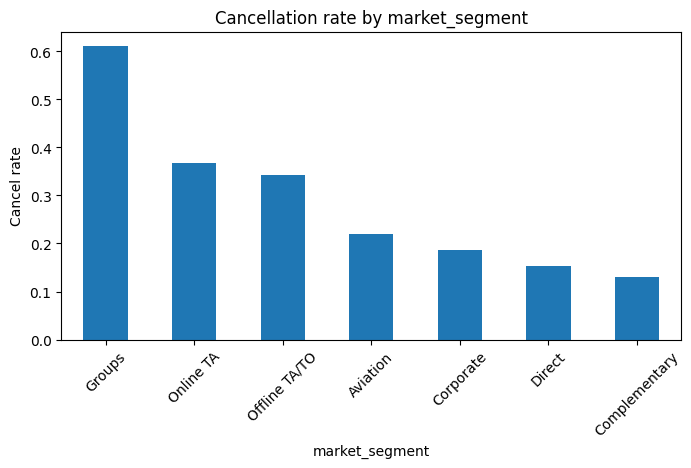


### distribution_channel


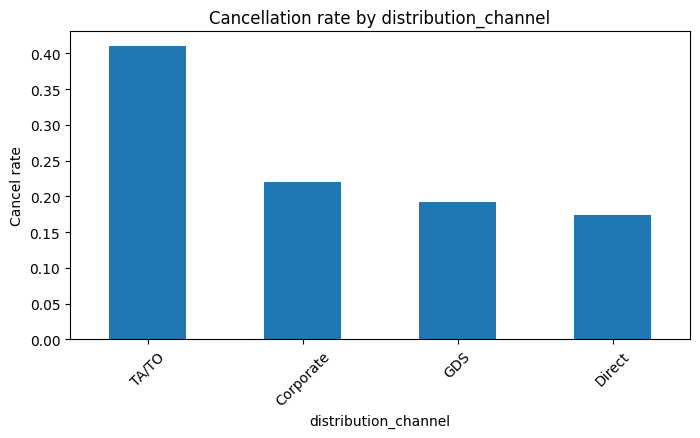


### deposit_type


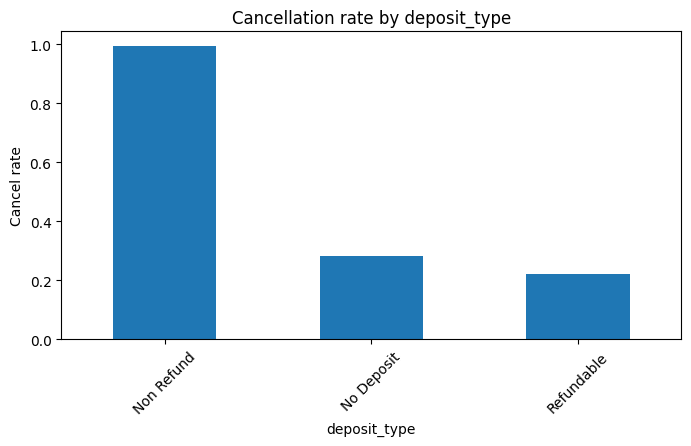


### customer_type


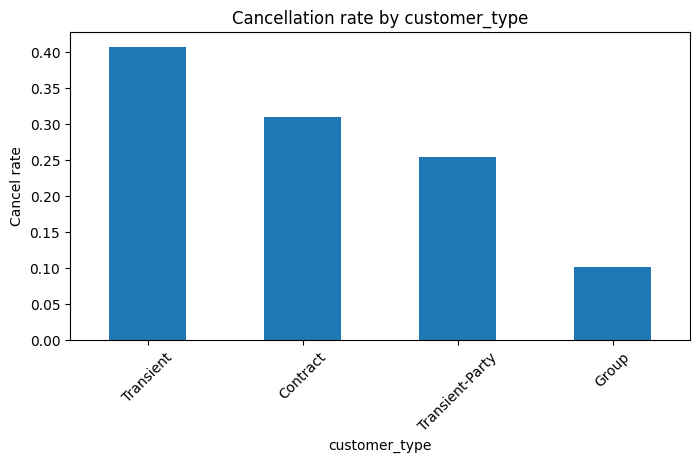


### is_repeated_guest


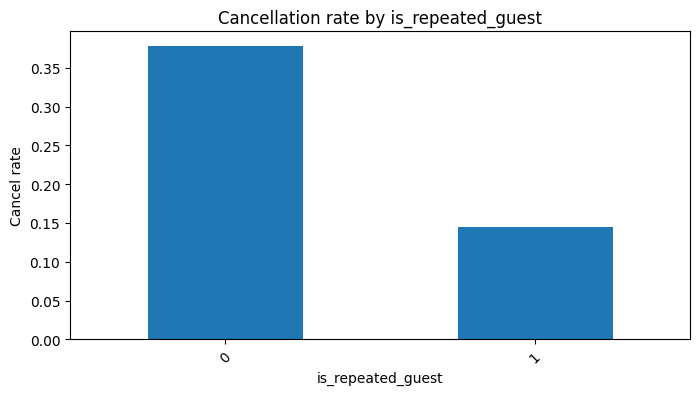


### reserved_room_type


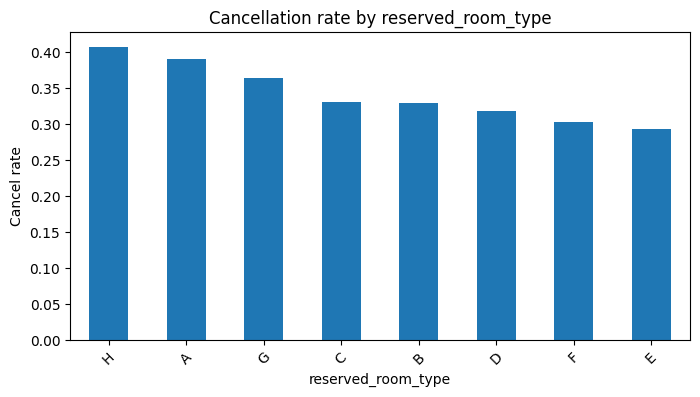


### assigned_room_type


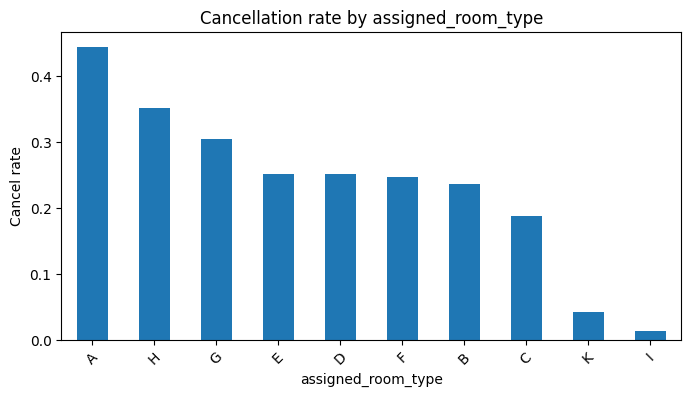


### country


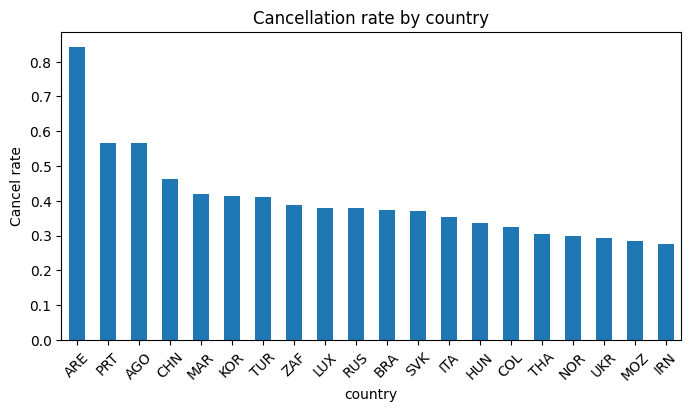

In [ ]:
hr("Categorical drivers — market_segment / distribution_channel / deposit_type / customer_type / is_repeated_guest")

for col in ['market_segment',
            'distribution_channel',
            'deposit_type',
            'customer_type',
            'is_repeated_guest',
            'reserved_room_type',
            'assigned_room_type',
            'country']:
    if col in df.columns:
        print(f"\n### {col}")
        rate_by_category(df, col, min_count=50)


### 3.3 Посмотрим на числовые переменные

In [ ]:
# ============================================
# 1) Сводная таблица по числовым признакам в разрезе is_canceled
# ============================================

def numeric_summary_by_target(
    df: pd.DataFrame,
    target: str = "is_canceled",
    cols: list | None = None,
    percentiles: tuple = (0.05, 0.25, 0.75, 0.95),
    dropna_target: bool = True
) -> pd.DataFrame:
    """
    Возвращает таблицу, где строки — числовые переменные,
    а столбцы — MultiIndex (is_canceled ∈ {0,1}, статистика).

    Включает: count, mean, median, min, выбранные percentiles, max.
    """
    # Отберём числовые колонки, исключая целевую если она числовая
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)
    if cols is not None:
        num_cols = [c for c in cols if c in num_cols]

    # По желанию — исключить строки с NaN в target
    work = df.copy()
    if dropna_target:
        work = work[work[target].notna()]

    # Список уникальных значений таргета (ожидаем 0/1)
    groups = sorted([g for g in work[target].dropna().unique().tolist()])

    # Порядок статистик
    q_names = [f"p{int(p*100):02d}" for p in percentiles]
    stat_order = ["count", "mean", "median", "min", *q_names, "max"]

    rows = []
    for col in num_cols:
        data = {}
        # Групповой перебор: для каждого значения target посчитаем набор статистик
        for g in groups:
            s = work.loc[work[target] == g, col].dropna()
            # базовые
            stats = {
                "count": int(s.shape[0]),
                "mean": float(s.mean()) if s.shape[0] else np.nan,
                "median": float(s.median()) if s.shape[0] else np.nan,
                "min": float(s.min()) if s.shape[0] else np.nan,
                "max": float(s.max()) if s.shape[0] else np.nan,
            }
            # перцентили
            for p, name in zip(percentiles, q_names):
                stats[name] = float(s.quantile(p)) if s.shape[0] else np.nan

            # записываем с ключом (target, stat)
            for k, v in stats.items():
                data[(g, k)] = v

        row = pd.Series(data, name=col)
        rows.append(row)

    out = pd.DataFrame(rows)
    # Упорядочим колонки: сначала по target, затем по списку статистик
    out.columns = pd.MultiIndex.from_tuples(out.columns, names=[target, "stat"])
    # Пересоберём колонки в заданном порядке
    ordered_cols = []
    for g in groups:
        for st in stat_order:
            if (g, st) in out.columns:
                ordered_cols.append((g, st))
    out = out.reindex(columns=pd.MultiIndex.from_tuples(ordered_cols))
    return out

In [ ]:
def plot_numeric_distributions(
    df: pd.DataFrame,
    target: str = "is_canceled",
    cols: list | None = None,
    exclude_cols: list | None = None,
    bins: int = 30,
    density: bool = True,
    alpha: float = 0.6,
    colors: tuple = ("tab:blue", "tab:orange"),
    clip_quantiles: tuple[float, float] | None = None,
    dropna_target: bool = True,
    figsize: tuple = (8, 4)
) -> None:
    """
    Для каждой числовой переменной рисует один график (hist),
    накладывая распределения для target=0 и target=1 разными цветами.
    Графики размещаются по 3 в строке.
    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)

    if cols is not None:
        num_cols = [c for c in cols if c in num_cols]

    if exclude_cols:
        exclude_set = set(exclude_cols)
        num_cols = [c for c in num_cols if c not in exclude_set]

    if not num_cols:
        raise ValueError("Нет числовых колонок для визуализации после применения исключений/фильтров.")

    work = df.copy()
    if dropna_target:
        work = work[work[target].notna()]

    n = len(num_cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig_w = figsize[0] * ncols
    fig_h = figsize[1] * nrows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_w, fig_h))
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]
        x0 = work.loc[work[target] == 0, col]
        x1 = work.loc[work[target] == 1, col]

        if clip_quantiles is not None:
            ql, qr = clip_quantiles
            lo, hi = work[col].quantile([ql, qr]).values
            x0 = x0.clip(lower=lo, upper=hi)
            x1 = x1.clip(lower=lo, upper=hi)

        x0 = x0.dropna().values
        x1 = x1.dropna().values

        ax.hist(x0, bins=bins, density=density, alpha=alpha, label=f"{target}=0", color=colors[0])
        ax.hist(x1, bins=bins, density=density, alpha=alpha, label=f"{target}=1", color=colors[1])
        ax.set_title(f"{col} by {target}")
        ax.set_xlabel(col)
        ax.set_ylabel("Density" if density else "Count")

    for j in range(n, nrows * ncols):
        axes[j].set_visible(False)

    handles, labels = axes[0].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.02))

    plt.tight_layout()
    plt.show()


In [ ]:
summary = numeric_summary_by_target(df, target="is_canceled")

summary

0                                \
                                    count      mean    median       min   
lead_time                      75,166.000    79.985    45.000     0.000   
arrival_date_year              75,166.000 2,016.148 2,016.000 2,015.000   
arrival_date_week_number       75,166.000    27.080    28.000     1.000   
arrival_date_day_of_month      75,166.000    15.840    16.000     1.000   
stays_in_weekend_nights        75,166.000     0.929     1.000     0.000   
stays_in_week_nights           75,166.000     2.464     2.000     0.000   
adults                         75,166.000     1.830     2.000     0.000   
children                       75,166.000     0.102     0.000     0.000   
babies                         75,166.000     0.010     0.000     0.000   
is_repeated_guest              75,166.000     0.043     0.000     0.000   
previous_cancellations         75,166.000     0.016     0.000     0.000   
previous_bookings_not_canceled 75,166.000     0.203     0.000     0.000   
booking_changes                75,166.000     0.293     0.000     0.000   
agent                          75,166.000    78.488     9.000    -1.000   
company                        75,166.000    13.284    -1.000    -1.000   
days_in_waiting_list           75,166.000     1.590     0.000     0.000   
adr                            75,166.000    99.988    92.500    -6.380   
required_car_parking_spaces    75,166.000     0.099     0.000     0.000   
total_of_special_requests      75,166.000     0.714     1.000     0.000   
party_size                     75,166.000     1.942     2.000     0.000   

                                                                        \
                                     p05       p25       p75       p95   
lead_time                          0.000     9.000   124.000   269.000   
arrival_date_year              2,015.000 2,016.000 2,017.000 2,017.000   
arrival_date_week_number           5.000    16.000    38.000    49.000   
arrival_date_day_of_month          2.000     8.000    23.000    30.000   
stays_in_weekend_nights            0.000     0.000     2.000     2.000   
stays_in_week_nights               0.000     1.000     3.000     5.000   
adults                             1.000     2.000     2.000     3.000   
children                           0.000     0.000     0.000     1.000   
babies                             0.000     0.000     0.000     0.000   
is_repeated_guest                  0.000     0.000     0.000     0.000   
previous_cancellations             0.000     0.000     0.000     0.000   
previous_bookings_not_canceled     0.000     0.000     0.000     0.000   
booking_changes                    0.000     0.000     0.000     2.000   
agent                             -1.000     7.000   171.000   250.000   
company                           -1.000    -1.000    -1.000    94.000   
days_in_waiting_list               0.000     0.000     0.000     0.000   
adr                               35.000    67.500   125.000   192.000   
required_car_parking_spaces        0.000     0.000     0.000     1.000   
total_of_special_requests          0.000     0.000     1.000     2.000   
party_size                         1.000     2.000     2.000     3.000   

                                                  1                      \
                                     max      count      mean    median   
lead_time                        737.000 44,224.000   144.849   113.000   
arrival_date_year              2,017.000 44,224.000 2,016.172 2,016.000   
arrival_date_week_number          53.000 44,224.000    27.310    27.000   
arrival_date_day_of_month         31.000 44,224.000    15.728    16.000   
stays_in_weekend_nights           19.000 44,224.000     0.925     1.000   
stays_in_week_nights              50.000 44,224.000     2.562     2.000   
adults                             4.000 44,224.000     1.902     2.000   
children                           3.000 44,224.000     0.107     0.000   
babies    

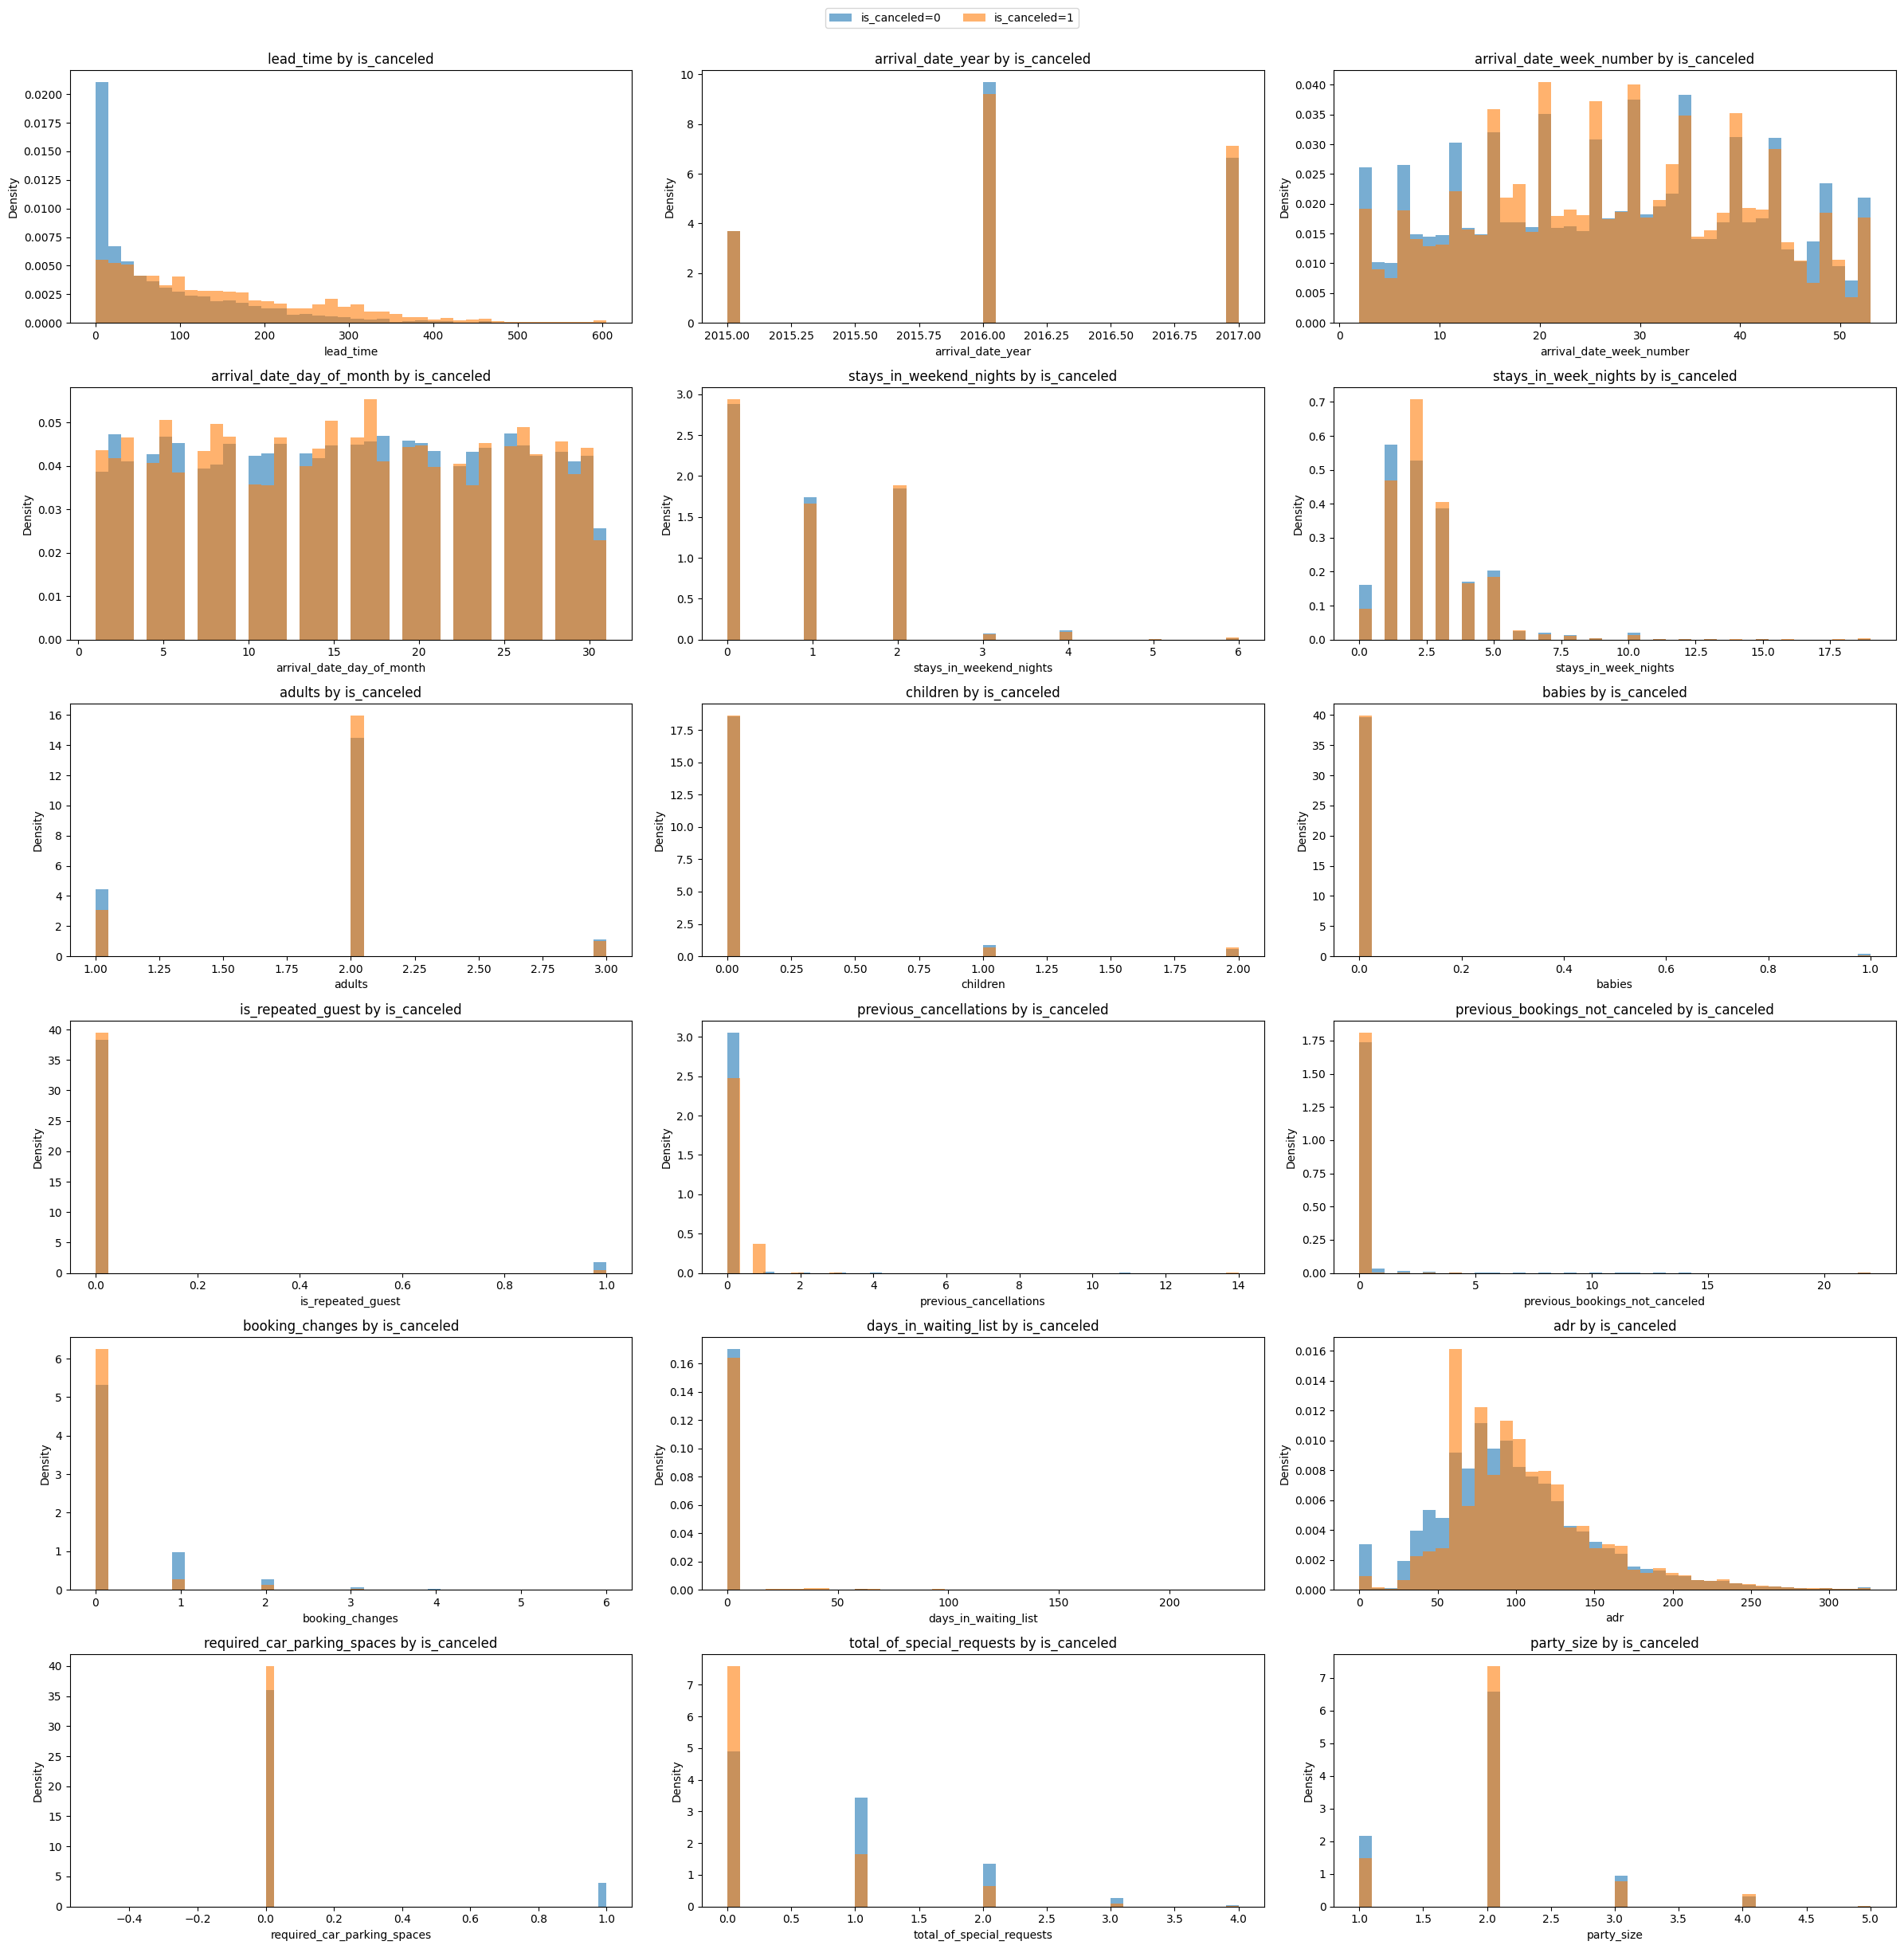

In [ ]:
# Рисуем распределения
plot_numeric_distributions(
    df,
    target="is_canceled",
    bins=40,
    clip_quantiles=(0.01, 0.999),  # чтобы не смотреть на графиках выбросы
    exclude_cols=['agent', 'company'] # agent и company - это ID колонки, их можно не смотреть на графиках
)

### **3.4 Смотрим более прицельно + генерируем гипотезы**

Посмотрим еще раз на распределение кол-ва дней от бронирования до заезда в отель (lead_time)

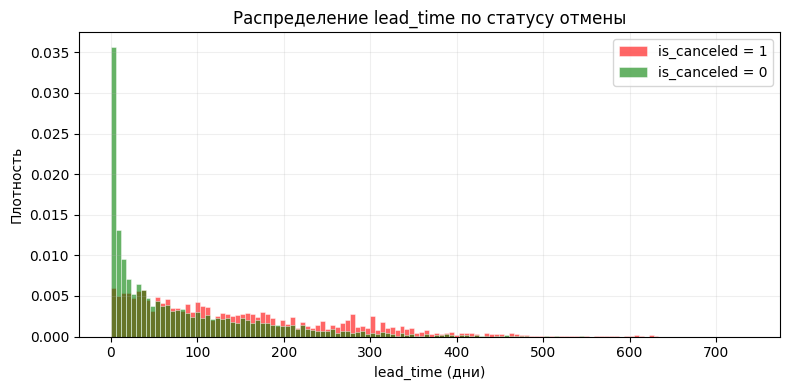

In [ ]:
# Данные
x_ok  = df.loc[df["is_canceled"] == 0, "lead_time"].dropna()
x_cxl = df.loc[df["is_canceled"] == 1, "lead_time"].dropna()

# Общие бины для корректного сравнения
bins = np.histogram_bin_edges(pd.concat([x_ok, x_cxl]), bins="fd")

plt.figure(figsize=(8, 4))
plt.hist(x_cxl, bins=bins, density=True, alpha=0.6, color="red",   label="is_canceled = 1", edgecolor="white", linewidth=0.5)
plt.hist(x_ok,  bins=bins, density=True, alpha=0.6, color="green", label="is_canceled = 0", edgecolor="white", linewidth=0.5)
plt.title("Распределение lead_time по статусу отмены")
plt.xlabel("lead_time (дни)")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Что мы видим**:
- Если человек делает бронирование день в день (или за 1 / 2 / 3 дня до заезда), то скорее **не** отменит такую резервацию
- А если бронирование делается сильно заранее (например, 300+ дней до заезда), то велика вероятность отмены такой брони

**Гипотезы**:
- Люди, которые делают бронирования сильно заранее, могут делать их "на всякий случай", без серьезного намерения закезжать в отель
- За большой период у людей могут меняться планы, даже если изначально было серьезное намерение заезжать в отель.

**Потенциальные решения (которые нужно тестировать - не просто внедрять):**
- Небольшая предоплата за раннюю бронь (отсекаем тех, кто не имеет серьезных намерений)
- email / sms напоминания (даже если отменит бронь, то сделает это за 100 дней, а не за 1 день)
- ...

Посмотрим на долю отмененных броней в зависимости от типа депозита за номер

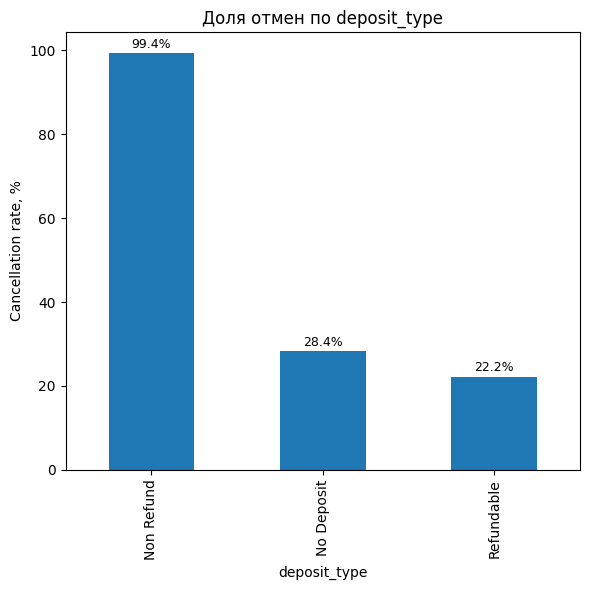

In [ ]:
# Доля отмен по типу депозита
rate = (
    df.groupby("deposit_type")["is_canceled"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6, 6))
ax = (rate * 100).plot(kind="bar")
ax.set_title("Доля отмен по deposit_type")
ax.set_xlabel("deposit_type")
ax.set_ylabel("Cancellation rate, %")

# Подписи над столбцами
for i, v in enumerate(rate.values * 100):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

99.4% **non-refundable** номеров отменяют? То есть по броням, где пользователь должен полностью оплатить стоимость отеля заранее - почти все отменяют...? Почему?

- Может, у нас (у наших DWH-инженеров / аналитиков / ...) проблемы в данных, и признаки проставляются неправильно? *Вполне возможно в реальной жизни*
- А конкретно в этом датасете - объяснение такое: подавляющее большинство non-refund броней - от людей, которые хотят оформить португальскую визу, для которой такое бронирование необходимо. Но люди специально вводят неверные данные банковской карты, чтобы оплата не прошла. В итоге такие бронирования автоматически отменяются. Подробнее вот тут, если интересно: [link](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/discussion/131787#836862)

Проверим, сколько у нас всего строк с такими бронями:

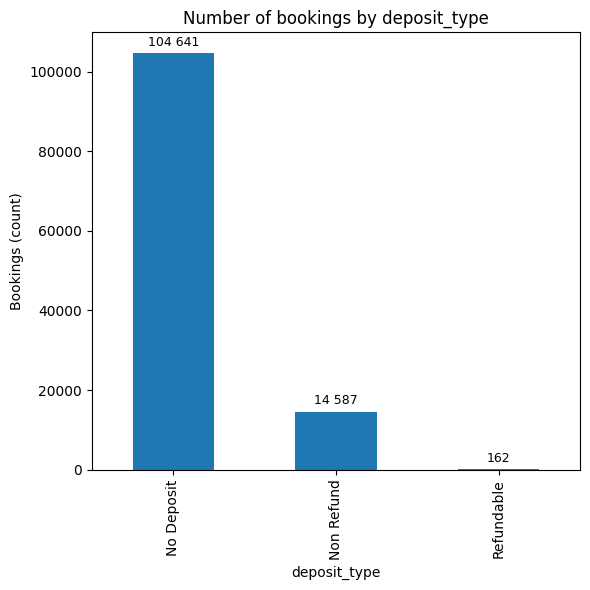

In [ ]:
# Количество всех броней по типу депозита
counts = (
    df["deposit_type"]
      .value_counts()
      .sort_values(ascending=False)
)

plt.figure(figsize=(6, 6))
ax = counts.plot(kind="bar")
ax.set_title("Number of bookings by deposit_type")
ax.set_xlabel("deposit_type")
ax.set_ylabel("Bookings (count)")

# Подписи над столбцами
for i, v in enumerate(counts.values):
    ax.text(i, v + max(counts.values)*0.01, f"{int(v):,}".replace(",", " "),
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

14 тысяч строк. Давайте их просто удалим (хотя для бизнеса тоже очень важно понимать такие corner-кейсы, когда пользователи фродят).

In [ ]:
df_new = df[df['deposit_type'] != 'Non Refund'].copy()

C учетом того, что мы обнаружили достаточно серьезную проблему в данных, давайте перепроверим выводы, которые мы делали по lead_time

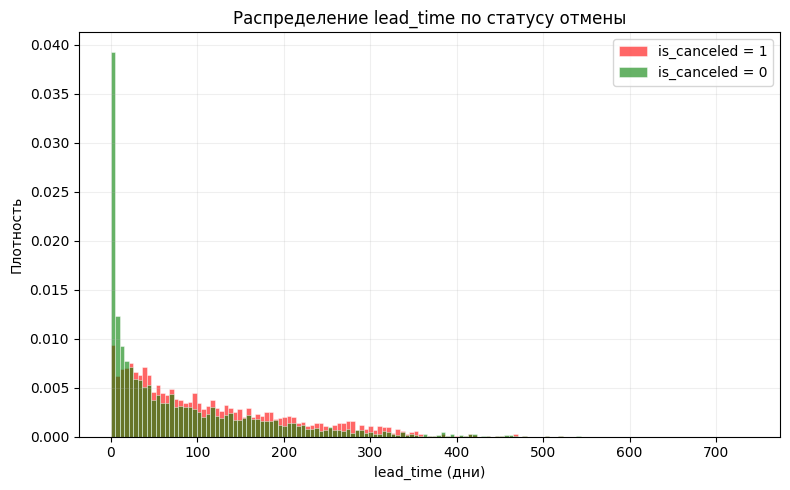

In [ ]:
# Данные
x_ok  = df_new.loc[df_new["is_canceled"] == 0, "lead_time"].dropna()
x_cxl = df_new.loc[df_new["is_canceled"] == 1, "lead_time"].dropna()

# Общие бины для корректного сравнения
bins = np.histogram_bin_edges(pd.concat([x_ok, x_cxl]), bins="fd")

plt.figure(figsize=(8, 5))
plt.hist(x_cxl, bins=bins, density=True, alpha=0.6, color="red",   label="is_canceled = 1", edgecolor="white", linewidth=0.5)
plt.hist(x_ok,  bins=bins, density=True, alpha=0.6, color="green", label="is_canceled = 0", edgecolor="white", linewidth=0.5)
plt.title("Распределение lead_time по статусу отмены")
plt.xlabel("lead_time (дни)")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

График изменился - стало сильно меньше "красных" броней. Но наши выводы все еще остаются в силе. Теперь давайте работать только с df_new

Посмотрим на канал продаж, и сразу выведем кол-во строк для каждой группы

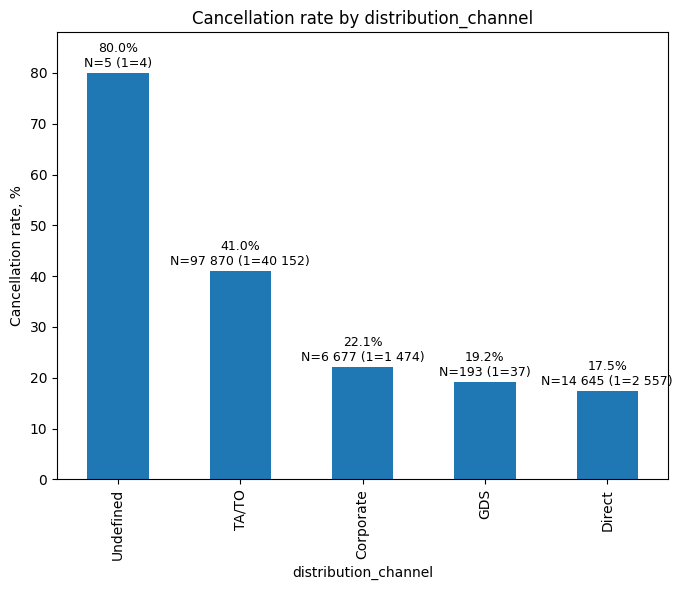

In [ ]:
# Группировка: количество, отменённые, и доля отмен
g = (
    df.groupby("distribution_channel")["is_canceled"]
      .agg(total="size", canceled="sum", rate="mean")
      .sort_values("rate", ascending=False)
)

plt.figure(figsize=(7, 6))
ax = (g["rate"] * 100).plot(kind="bar")

ax.set_title("Cancellation rate by distribution_channel")
ax.set_xlabel("distribution_channel")
ax.set_ylabel("Cancellation rate, %")
ax.set_ylim(0, (g["rate"]*100).max() * 1.1)

# Подписи: процент + N и (кол-во отмен) для каждой категории
for i, (idx, row) in enumerate(g.iterrows()):
    y = row["rate"] * 100
    total = f"{int(row['total']):,}".replace(",", " ")
    canceled = f"{int(row['canceled']):,}".replace(",", " ")
    ax.text(i, y + 0.6, f"{y:.1f}%\nN={total} (1={canceled})",
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

В Undefined группу можно даже не смотреть - там всего 5 строк. То есть нельзя смотреть на процентные метрики просто так, нужно обязательно понимать, от какой базы они считаются.

**Что мы видим**:
- Высокий cancellation rate в группе "TA/TO". Расшифровка - Travel Agencies/Travel Operators. То есть туристические агенства. (GDS - это международная система бронирований / direct - забронировал сам (физлицо) / corporate - бронь через юрлицо)

**Гипотезы**:
- Агентства плохо рассчитывают спрос / делают слишком много бронирований "на всякий случай"
- Через агенства может литься какой-то фрод (например, агенство делает фейковую бронь, чтобы ты мог получить какой-то документ)

**Потенциальные решения (которые нужно тестировать - не просто внедрять):**
- Проверяем агенства на наличие фрода. Если есть (и достаточно много) -> думаем над антифрод решениями
- Не позволяем агентствам делать бронирования без какого-то подтверждения того, что у них реально есть люди, которые хотят заселяться. Т.е. не даем агенствам делать брони "впрок".


Посмотрим на Market Segment

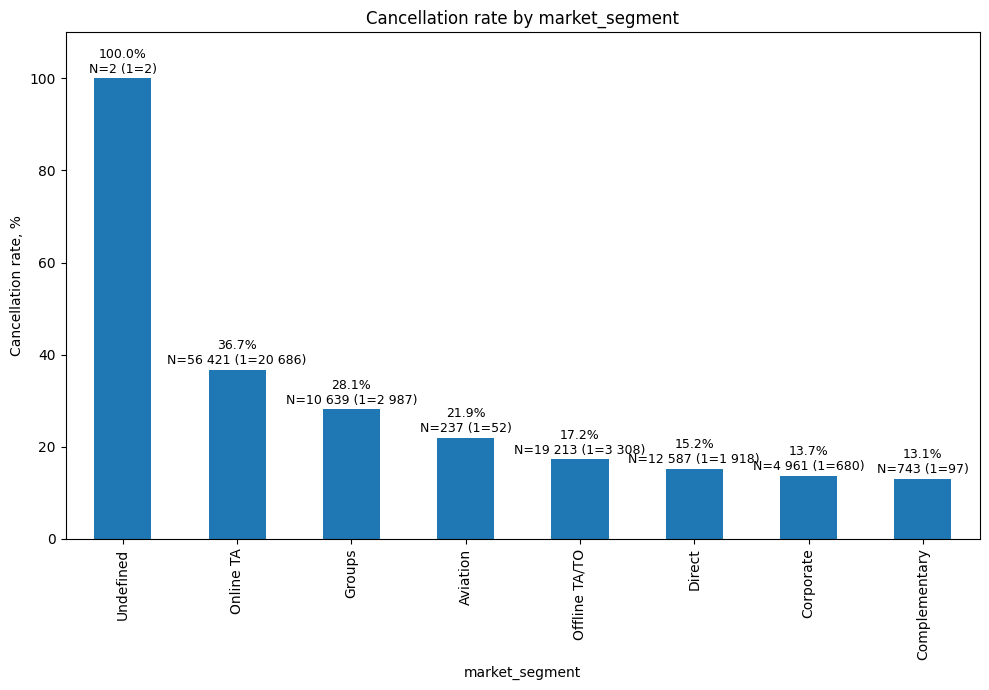

In [ ]:
# Группировка: количество, отменённые, и доля отмен
g = (
    df_new.groupby("market_segment")["is_canceled"]
      .agg(total="size", canceled="sum", rate="mean")
      .sort_values("rate", ascending=False)
)

plt.figure(figsize=(10, 7))
ax = (g["rate"] * 100).plot(kind="bar")

ax.set_title("Cancellation rate by market_segment")
ax.set_xlabel("market_segment")
ax.set_ylabel("Cancellation rate, %")
ax.set_ylim(0, (g["rate"]*100).max() * 1.1)

# Подписи: процент + N и (кол-во отмен) для каждой категории
for i, (idx, row) in enumerate(g.iterrows()):
    y = row["rate"] * 100
    total = f"{int(row['total']):,}".replace(",", " ")
    canceled = f"{int(row['canceled']):,}".replace(",", " ")
    ax.text(i, y + 0.6, f"{y:.1f}%\nN={total} (1={canceled})",
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

+- Те же гипотезы и решения, что и на предыдущем графике. Видим, что Online Travel Agencies генерируют много отмен броней. Возможно, стоит их прижучить!

Посмотрим на тип гостя: новый / повторный

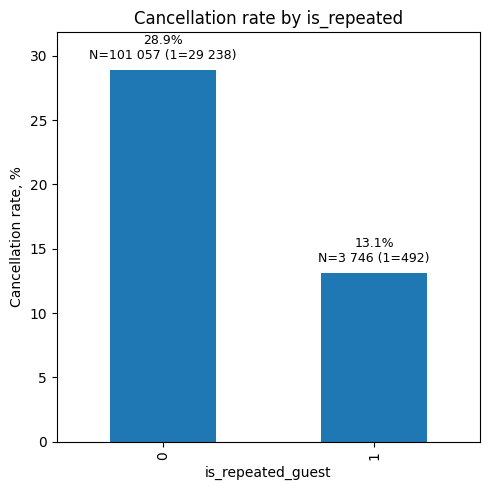

In [ ]:
# Группировка: количество, отменённые, и доля отмен
g = (
    df_new.groupby("is_repeated_guest")["is_canceled"]
      .agg(total="size", canceled="sum", rate="mean")
      .sort_values("rate", ascending=False)
)

plt.figure(figsize=(5, 5))
ax = (g["rate"] * 100).plot(kind="bar")

ax.set_title("Cancellation rate by is_repeated")
ax.set_xlabel("is_repeated_guest")
ax.set_ylabel("Cancellation rate, %")
ax.set_ylim(0, (g["rate"]*100).max() * 1.1)

# Подписи: процент + N и (кол-во отмен) для каждой категории
for i, (idx, row) in enumerate(g.iterrows()):
    y = row["rate"] * 100
    total = f"{int(row['total']):,}".replace(",", " ")
    canceled = f"{int(row['canceled']):,}".replace(",", " ")
    ax.text(i, y + 0.6, f"{y:.1f}%\nN={total} (1={canceled})",
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

Тут все просто. Если гость был у нас раньше - то он с меньшей вероятностью отменит бронь. Если гость новый - то с большей вероятностью отменит бронь.

Может, стоит завлекать "старичков" программой лояльности?

Чуть не забыли посмотреть на цены! Давайте исследуем.

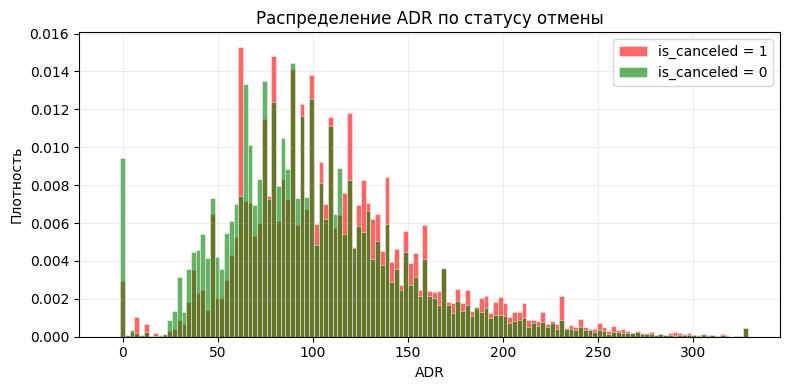

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Разделим ADR по статусу отмены
x_ok  = df_new.loc[df_new["is_canceled"] == 0, "adr"].dropna()
x_cxl = df_new.loc[df_new["is_canceled"] == 1, "adr"].dropna()

# Обрежем правый хвост по 99-му перцентилю для читабельности
hi = np.nanpercentile(df_new["adr"], 99.9)
x_ok  = x_ok.clip(upper=hi)
x_cxl = x_cxl.clip(upper=hi)

# Общие бины для корректного сравнения
bins = np.histogram_bin_edges(pd.concat([x_ok, x_cxl]), bins="fd")

plt.figure(figsize=(8, 4))
plt.hist(x_cxl, bins=bins, density=True, alpha=0.6, color="red",   label="is_canceled = 1", edgecolor="white", linewidth=0.5)
plt.hist(x_ok,  bins=bins, density=True, alpha=0.6, color="green", label="is_canceled = 0", edgecolor="white", linewidth=0.5)
plt.title("Распределение ADR по статусу отмены")
plt.xlabel("ADR")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


Тут уже сложнее генерировать какие-то выводы. В целом видно, что красное распределение чуть-чуть сдвинуто вправо относительно зеленого. Это означает, что в целом отмены более вероятны для более дорогих бронирований. Но прямой очевидной взаимосвязи тут уже нет.

Эта метрика дает пример, когда одного EDA уже может не хватать для полноценного анализа - и нужно или сильно погружаться в данные и смотреть на ADR в разных разрезах, или необходимо уже применять модели ML, которые могут "ловить" нелинейное влияние цены на вероятность отмены брони.




Посмотрим, как у нас распределяются брони по lead_time и ADR

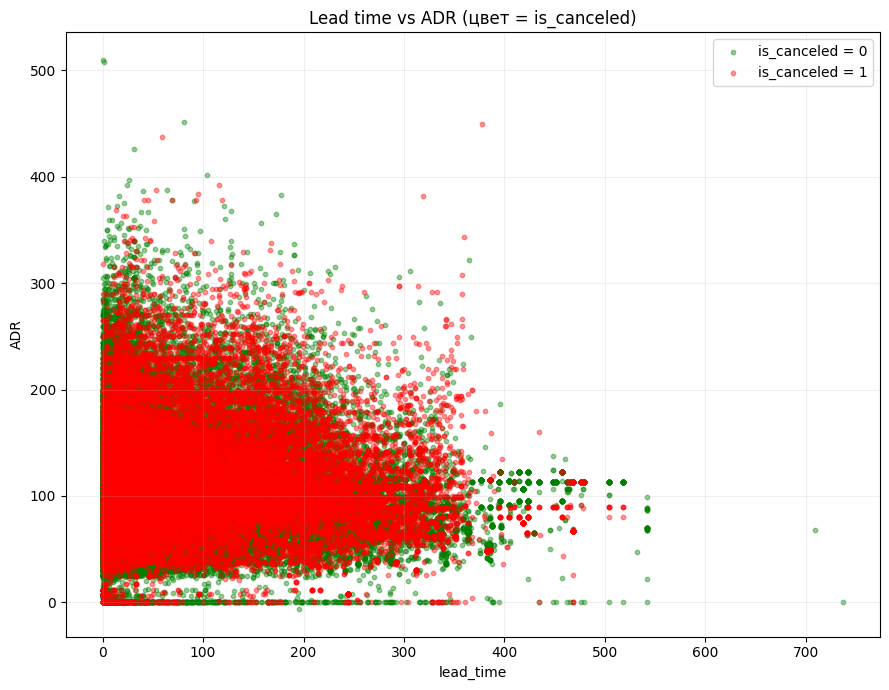

In [ ]:

# Точки по классам отмены
x0 = df_new.loc[df["is_canceled"] == 0, "lead_time"]
y0 = df_new.loc[df["is_canceled"] == 0, "adr"]
x1 = df_new.loc[df["is_canceled"] == 1, "lead_time"]
y1 = df_new.loc[df["is_canceled"] == 1, "adr"]

plt.figure(figsize=(9, 7))
plt.scatter(x0, y0, s=10, alpha=0.4, color="green", label="is_canceled = 0")
plt.scatter(x1, y1, s=10, alpha=0.4, color="red",   label="is_canceled = 1")

plt.title("Lead time vs ADR (цвет = is_canceled)")
plt.xlabel("lead_time")
plt.ylabel("ADR")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Именно на основании графика что-то сказать сложно, но наверняка могут быть какие-то нелинейные зависимости.

В графиках выше мы обнаруживали, что отмены броней более характерны для большого lead_time, а также для туристических агенств. Мы можем посмотреть на эти данные "одновременно" на одном графике.

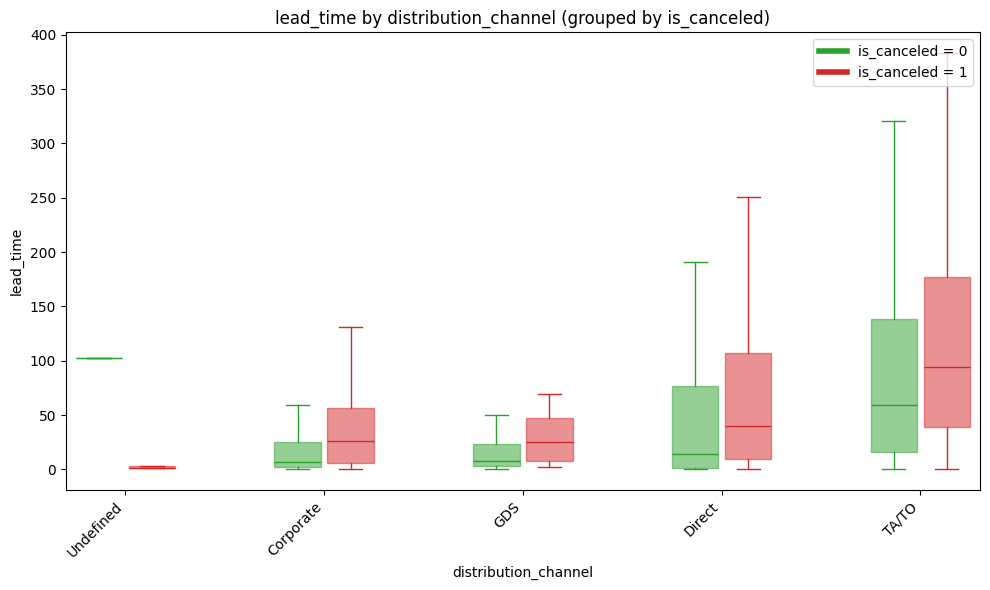

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Порядок категорий по медиане lead_time (как у вас)
order = (
    df_new.groupby("distribution_channel")["lead_time"]
          .median()
          .sort_values(ascending=True)
          .index.tolist()
)

# Данные по группам внутри каждой категории
data_0 = [df_new.loc[(df_new["distribution_channel"] == cat) & (df_new["is_canceled"] == 0), "lead_time"].dropna()
          for cat in order]
data_1 = [df_new.loc[(df_new["distribution_channel"] == cat) & (df_new["is_canceled"] == 1), "lead_time"].dropna()
          for cat in order]

# Позиции для "сдвоенных" боксплотов по категориям
n = len(order)
base = np.arange(n) * 3.0      # шаг между категориями
pos0 = base - 0.4              # is_canceled = 0 (слегка левее)
pos1 = base + 0.4              # is_canceled = 1 (слегка правее)
centers = base                 # подписи категорий ставим посередине пары

plt.figure(figsize=(10, 6))

# Боксплоты по двум группам с разными цветами
bp0 = plt.boxplot(
    data_0, positions=pos0, widths=0.7, showfliers=False, patch_artist=True
)
bp1 = plt.boxplot(
    data_1, positions=pos1, widths=0.7, showfliers=False, patch_artist=True
)

# Раскраска: зелёный для 0, красный для 1
for elem in ['boxes', 'whiskers', 'caps', 'medians']:
    for art in bp0[elem]:
        art.set_color('#2ca02c')
for patch in bp0['boxes']:
    patch.set_facecolor('#2ca02c')
    patch.set_alpha(0.5)

for elem in ['boxes', 'whiskers', 'caps', 'medians']:
    for art in bp1[elem]:
        art.set_color('#d62728')
for patch in bp1['boxes']:
    patch.set_facecolor('#d62728')
    patch.set_alpha(0.5)

# Оси и подписи
plt.xticks(centers, order, rotation=45, ha="right")
plt.title("lead_time by distribution_channel (grouped by is_canceled)")
plt.xlabel("distribution_channel")
plt.ylabel("lead_time")

# Легенда
legend_elems = [
    Line2D([0], [0], color='#2ca02c', lw=4, label='is_canceled = 0'),
    Line2D([0], [0], color='#d62728', lw=4, label='is_canceled = 1'),
]
plt.legend(handles=legend_elems, loc="upper right")

plt.tight_layout()
plt.show()


Для всех категорий distribution_channel (на undefined не смотрим) соблюдается зависимость, что отмены броней более характерны для бОльшего lead_time.

И можно продолжать достаточно долго... есть еще интересные переменные, в которые мы не погрузились отдельно, но при этом которые могут влиять на вероятность отмены броней.

## **4. А зачем все это было нужно?**


Все, что мы делали выше - не rocket science: мы только загрузили данные и покрутили их через понятные графики. А что в итоге это принесло:
- Мы увидели достаточно критичную проблему в данных (в реальном мире это бы точно был бы приоритетный баг для DWH-инженеров) или критичный фрод-паттерн (пользователи создают через нас фейковые брони)
- Мы принесли бизнесу конкретные гипотезы для развития нашего продукта (в данном случае - отельного бизнеса). Решение некоторых проблем, которые мы подсветили *на данных* в этом ноутбуке, могут значимо повлиять на выручку бизнеса (а мы ведь даже не делали каких-то сложных моделей!)